# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

In this module we will look at the historical exchange rate of the dollar (US) against the Rupiah. the following data is taken from the **EXCHANGE-RATES** web page that they use word currency exchange rates and currency exchange rate history.

we use webscrapping as a data retrieval technique through the website. Data that is successfully extracted will be processed using the help of one of the libraries in python, **BEAUTIFULSOAP.**

The following data analysis aims to see the exchange rate of the USD dollar against the Rupiah over the past 1 month. From the historical dara we can see and predict the exchange rate of the dollar (USD) over the next few days.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get=requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))
print(soup.prettify()[:500])

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


## Finding the right key to scrap the data & Extracting the right information

In this section we must retrieve the specific data in the information column we need. to retrieve the data, find_all function is the appropriate function used for finding out all tags with the specified tag name or id and returning them as a list of type bs4.

the command below is an example of an order to retrieve data in the column **"USD IDR rate of each date"**. In extracting data, here are the steps that must be done:

    1. determine wich columns to extract
    2. hover over the column and then inspect it to retrieve the column link
    3. specify a general link to take 
    4. enter the website into the function in accordance with the information we need.
    5. then add .text To get the only text information
    
Here is the data that reads the results of the steps above

In [5]:
table = soup.find('table',attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:400])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/10/2022
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-10-2022">
     14,295.29905
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-10-2022">
     USD IDR rate for 1/10/2022
    </a>
   </td>
  </tr>


## Extract the Information

 All left to do is doing some programming to extract all the data automaticly, but before that let's check how long is our data to help our looping process. Since find_all will always return data in format list, we will use len() to check how long is our list

In [6]:
row=table.find_all('td',attrs={'class':'text-narrow-screen-hidden'})
row_length=len(row)
row_length

129

Based on the information above, we already know the length of the line on the data. There are 130 lines in the diaas data. This information will be used for looping process. Looping processes aim for automatic extraction of data according to the length of the data (rows). so that we do not need to take and search data [.find()] one by one manually.

okay now we know the length of our data, now here what we will do for the looping process.

Here what the looping do to scrap the information:

- First we need to establish a placeholder to receive the information that we scrap
- We named our placeholder temp and it's a list.
- Then we will make a loop from one until the the length of the table row,
- which we will find all cell of the column one and two which contain period and the inflation rate.
- Then we will append it to our tuple that we prepared before,
- every one iteration we will scrap one line of the table.

In [7]:
temp = [] #initiating a tuple

for i in range(0,row_length):

   
    tanggal = table.find_all('tr')[i].findAll('td')[0].text
    harga_harian = table.find_all('tr')[i].findAll('td')[2].text
        
    temp.append((tanggal,harga_harian))
    temp = temp[::-1]

temp

[('7/14/2021', '14,404.17703 IDR'),
 ('7/16/2021', '14,495.41215 IDR'),
 ('7/20/2021', '14,514.10964 IDR'),
 ('7/22/2021', '14,508.09177 IDR'),
 ('7/26/2021', '14,487.54718 IDR'),
 ('7/28/2021', '14,414.21667 IDR'),
 ('7/30/2021', '14,501.55250 IDR'),
 ('8/3/2021', '14,391.49693 IDR'),
 ('8/5/2021', '14,315.95314 IDR'),
 ('8/9/2021', '14,363.60538 IDR'),
 ('8/11/2021', '14,385.48676 IDR'),
 ('8/13/2021', '14,327.19776 IDR'),
 ('8/17/2021', '14,439.92418 IDR'),
 ('8/19/2021', '14,411.77604 IDR'),
 ('8/23/2021', '14,400.21794 IDR'),
 ('8/25/2021', '14,386.20000 IDR'),
 ('8/27/2021', '14,368.74436 IDR'),
 ('8/31/2021', '14,296.13264 IDR'),
 ('9/2/2021', '14,248.52165 IDR'),
 ('9/6/2021', '14,214.47321 IDR'),
 ('9/8/2021', '14,251.89711 IDR'),
 ('9/10/2021', '14,226.67070 IDR'),
 ('9/14/2021', '14,244.84504 IDR'),
 ('9/16/2021', '14,250.19893 IDR'),
 ('9/20/2021', '14,235.10302 IDR'),
 ('9/22/2021', '14,299.15334 IDR'),
 ('9/24/2021', '14,272.18430 IDR'),
 ('9/28/2021', '14,271.16497 IDR')

### Looping Process Succeed



## Creating data frame & Data wrangling

Now we have done the data extraction with the looping process. To be able to do further analysis, then we move it in to data frame (df). check our dataframe data types to see if our data is useable. 

In [50]:
df = pd.DataFrame(temp,columns=('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,7/14/2021,"14,404.17703 IDR"
1,7/16/2021,"14,495.41215 IDR"
2,7/20/2021,"14,514.10964 IDR"
3,7/22/2021,"14,508.09177 IDR"
4,7/26/2021,"14,487.54718 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [51]:
df.dtypes


tanggal         object
harga_harian    object
dtype: object

from the data above, at first the data in the 'tanggal' column and 'harga_harian' is still as "object" datatype. we need to change the data type in the 'tanggal' column to datetime64 and 'harga_harian' to float64 so we able to analyzing the data.

moreover, we need to replace the string (,) and (IDR) in 'harga_harian'.

In [55]:
df['tanggal']=df['tanggal'].astype('datetime64')
df['harga_harian']=df['harga_harian'].str.replace('IDR','')
df['harga_harian']=df['harga_harian'].str.replace(',','')
df['harga_harian']=df['harga_harian'].astype('float64')
df.head()

,tanggal,harga_harian
0,2021-07-14,"14,404.177"
1,2021-07-16,"14,495.412"
2,2021-07-20,"14,514.110"
3,2021-07-22,"14,508.092"
4,2021-07-26,"14,487.547"


In [68]:
df = df.set_index('tanggal')

<AxesSubplot:xlabel='tanggal'>

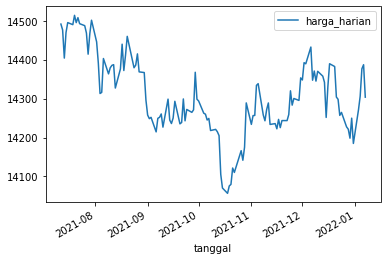

In [69]:
df.plot()

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

from the data above, we can see that the lowest rate was between October and November 2021. and the highest rate was on June 2021.



(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.